# Data normalitzation
#
## Import the necessary libreries.

In [1]:
import pandas
import seaborn 
import matplotlib.pyplot 
import numpy 
from sklearn.preprocessing import QuantileTransformer

## Open the data and buinding the datafame

In [2]:
file_path = '/home/marti/jupy/jup_notebook/Project/result/data.csv'
data_original = pandas.read_csv(file_path, index_col = 0,delimiter='\t')
extra_info=data_original[:4]
data_original=data_original[4:]
data_original.head(5)

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,...,patient1988,patient1989,patient1990,patient1991,patient1992,patient1993,patient1994,patient1995,patient1996,patient1997
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,56.8355,74.7327,57.7846,46.0126,12.4196,53.8879,96.3471,68.3735,33.3739,33.3062,...,31.1013,32.6715,52.2535,33.1116,45.6996,56.9952,51.5911,39.8503,44.8110,14.0432
ENSG00000000005.6,0.0000,0.1668,0.0000,0.0000,0.0775,0.0636,0.0000,0.0000,0.0000,1.5346,...,0.0000,0.0000,0.0246,0.0391,0.0461,0.0000,0.0000,0.0000,0.0000,0.0000
ENSG00000000419.13,87.9140,109.9944,134.5809,199.7075,60.5576,47.7809,108.2586,111.4444,46.9780,103.9621,...,72.4350,89.9746,113.8335,110.0302,69.3967,114.7565,99.2550,102.3000,185.0433,98.2518
ENSG00000000457.14,8.8095,9.4624,11.6945,17.6547,3.4318,4.5405,17.7623,10.9897,5.4694,23.5618,...,6.9302,4.1626,9.1551,7.0918,4.5215,8.9580,5.6158,6.0453,4.9388,5.1934
ENSG00000000460.17,5.8867,5.3551,4.7701,3.8401,1.2933,2.8140,15.3762,9.7393,2.2210,23.4849,...,12.3134,4.8411,9.4480,6.1057,2.2129,14.1934,4.6770,6.0986,8.3207,5.9877


In [3]:
#Capeador:
df=data_original.copy(deep=True)
df = df.iloc[:, :500]
df

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,...,patient491,patient492,patient493,patient494,patient495,patient496,patient497,patient498,patient499,patient500
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,56.8355,74.7327,57.7846,46.0126,12.4196,53.8879,96.3471,68.3735,33.3739,33.3062,...,44.6700,15.0951,31.1126,11.2592,29.3764,8.9717,59.7244,15.3503,39.7620,16.5095
ENSG00000000005.6,0.0000,0.1668,0.0000,0.0000,0.0775,0.0636,0.0000,0.0000,0.0000,1.5346,...,2.1049,0.6998,0.1370,0.5310,0.5735,0.3025,0.4846,1.0707,0.2110,1.2671
ENSG00000000419.13,87.9140,109.9944,134.5809,199.7075,60.5576,47.7809,108.2586,111.4444,46.9780,103.9621,...,81.0488,44.8492,67.8748,93.8242,58.9105,55.0134,83.1561,71.0120,68.1332,64.9493
ENSG00000000457.14,8.8095,9.4624,11.6945,17.6547,3.4318,4.5405,17.7623,10.9897,5.4694,23.5618,...,18.5062,11.3602,10.0314,9.0899,11.0787,9.6935,26.2549,17.5309,17.7633,10.0083
ENSG00000000460.17,5.8867,5.3551,4.7701,3.8401,1.2933,2.8140,15.3762,9.7393,2.2210,23.4849,...,12.9338,3.8061,6.7993,3.8288,7.0186,5.8551,21.0453,6.6491,8.1267,3.7593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0160,0.0000,0.0000,0.0195,0.0000
ENSG00000288670.1,12.2496,9.1300,21.0665,14.6670,6.4568,3.3500,16.6307,8.1449,7.7803,28.5791,...,13.9222,6.9598,8.7317,9.3970,5.8556,5.1184,8.0920,9.5175,8.7917,8.0212
ENSG00000288671.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [4]:
column_names = df.columns.tolist()
index_names = df.index

## Normalization data by quantile method

In [5]:
quantile_transformer = QuantileTransformer(output_distribution='uniform')
df_quantile = quantile_transformer.fit_transform(df)
print(df_quantile)

[[0.95216869 0.96842615 0.96037255 ... 0.83594089 0.95110656 0.8753999 ]
 [0.         0.52480467 0.         ... 0.5225254  0.41489848 0.5836604 ]
 [0.96997683 0.98009713 0.98563063 ... 0.97145991 0.97870624 0.97033631]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.45217053 0.39524481 0.53595443 ... 0.36219687 0.32774654 0.33566757]
 [0.7387075  0.63289481 0.62894188 ... 0.38543896 0.51220978 0.40884832]]


In [6]:
df_quantile = pandas.DataFrame(df_quantile, columns=column_names, index= index_names)
df_quantile.head()

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,...,patient491,patient492,patient493,patient494,patient495,patient496,patient497,patient498,patient499,patient500
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,0.952169,0.968426,0.960373,0.956869,0.881175,0.969221,0.968540,0.966871,0.943772,0.892181,...,0.950070,0.867887,0.941880,0.810778,0.924415,0.826448,0.965578,0.835941,0.951107,0.875400
ENSG00000000005.6,0.000000,0.524805,0.000000,0.000000,0.561470,0.497621,0.000000,0.000000,0.000000,0.507863,...,0.628005,0.504221,0.423886,0.480563,0.504261,0.449249,0.483483,0.522525,0.414898,0.583660
ENSG00000000419.13,0.969977,0.980097,0.985631,0.989645,0.965473,0.965208,0.972044,0.980415,0.960438,0.973889,...,0.977991,0.959632,0.975302,0.978982,0.970322,0.975909,0.977851,0.971460,0.978706,0.970336
ENSG00000000457.14,0.829290,0.834670,0.859326,0.902568,0.811349,0.818629,0.868046,0.859780,0.818591,0.852216,...,0.874831,0.836816,0.841102,0.785548,0.828249,0.835198,0.909496,0.850479,0.881856,0.819135
ENSG00000000460.17,0.804400,0.793311,0.802259,0.805637,0.760175,0.786068,0.859869,0.852219,0.763764,0.851873,...,0.834763,0.710363,0.800097,0.686616,0.779120,0.774731,0.889692,0.730124,0.791894,0.708687


## Boxplot of the data normalized

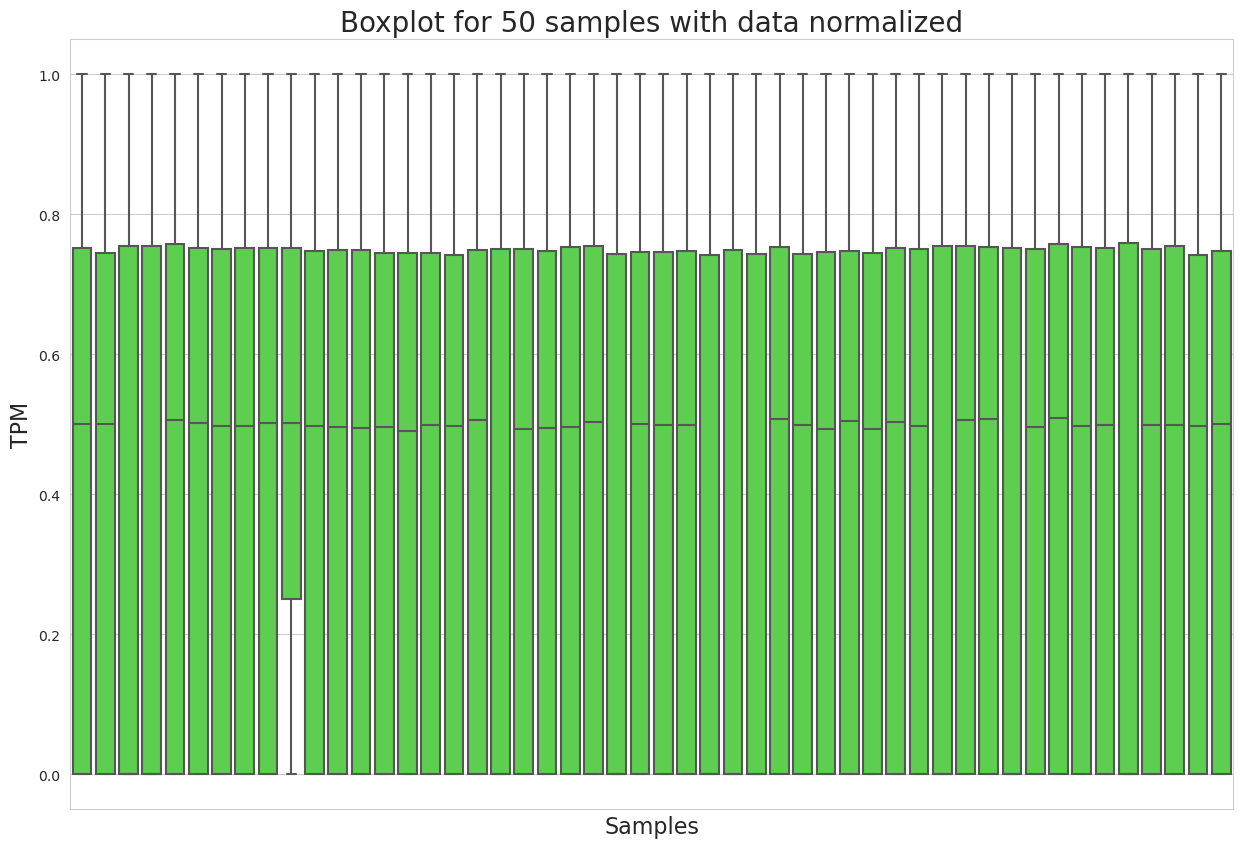

In [7]:
# BOXPLOT (Normalized)
matplotlib.pyplot.figure(figsize = (15, 10))
seaborn.set_style('whitegrid')

seaborn.boxplot(data = df_quantile.iloc[:,:50], color = '#4ee33b', flierprops = {'marker': 'o', 'markersize': 2})
#matplotlib.pyplot.axhline(y = samples_mean, color = 'grey', linestyle = '--')
matplotlib.pyplot. xticks([])

matplotlib.pyplot.title('Boxplot for 50 samples with data normalized', fontsize = 20)
matplotlib.pyplot.ylabel('TPM', fontsize = 16)
matplotlib.pyplot.xlabel('Samples',fontsize = 16)
matplotlib.pyplot.savefig('/home/marti/jupy/jup_notebook/Project/result/Graphs/n_boxplot.png')

## Not normalized boxplot

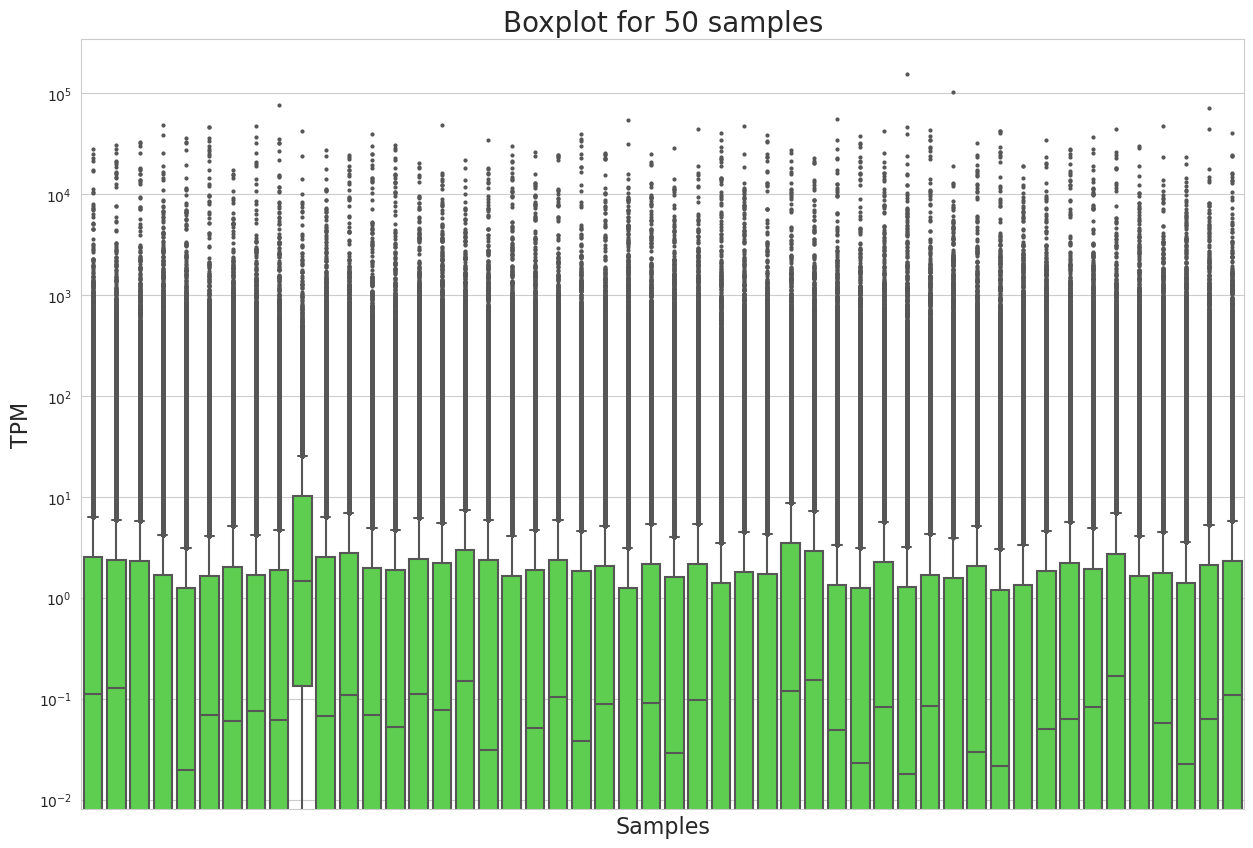

In [8]:
# BOXPLOT
matplotlib.pyplot.figure(figsize = (15, 10))
seaborn.set_style('whitegrid')

seaborn.boxplot(data = df.iloc[:,:50], color= '#4ee33b', flierprops = {'marker': 'o', 'markersize': 2})
#matplotlib.pyplot.axhline(y = samples_mean, color = 'grey', linestyle = '--')
matplotlib.pyplot. xticks([])

matplotlib.pyplot.yscale('log')

matplotlib.pyplot.title('Boxplot for 50 samples', fontsize = 20)
matplotlib.pyplot.ylabel('TPM', fontsize = 16)
matplotlib.pyplot.xlabel('Samples',fontsize = 16)
matplotlib.pyplot.savefig('/home/marti/jupy/jup_notebook/Project/result/Graphs/boxplot.png')

## Histogram of the normalized data

In [9]:
median_by_sample = df_quantile.median()

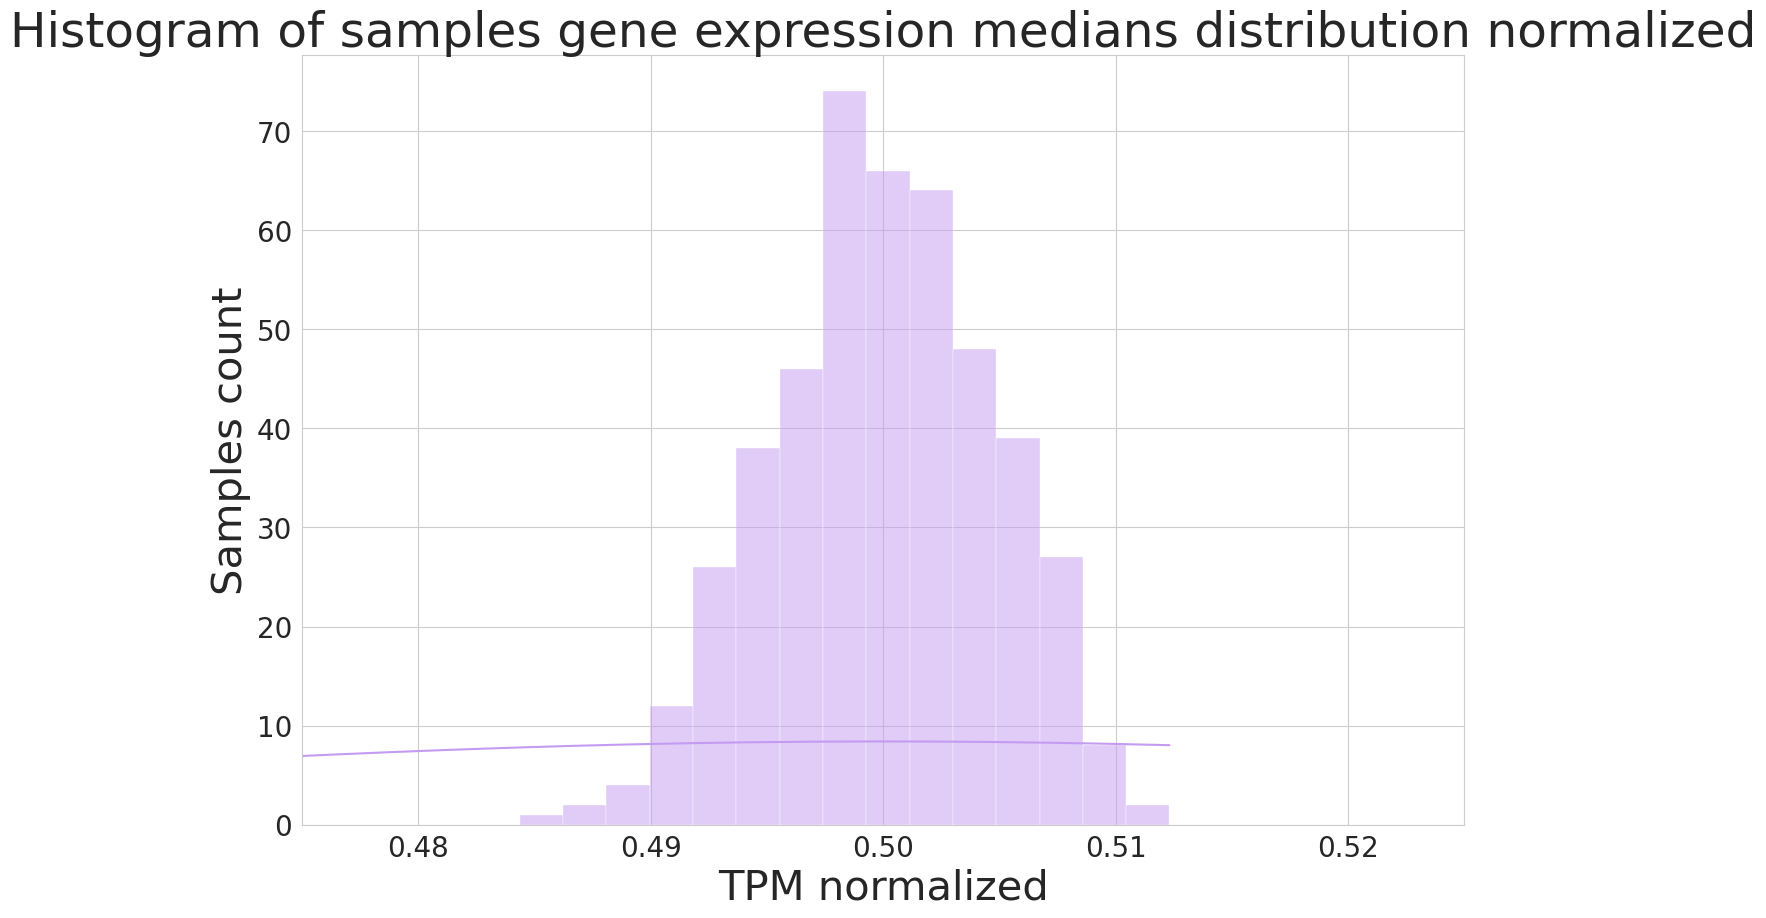

In [10]:
matplotlib.pyplot.figure(figsize = (15, 10))
seaborn.histplot(data = median_by_sample, x = median_by_sample[1:], kde = True, color = '#C39BF1')

matplotlib.pyplot.title('Histogram of samples gene expression medians distribution normalized', fontsize = 35)
matplotlib.pyplot.ylabel('Samples count', fontsize = 30)
matplotlib.pyplot.xlabel('TPM normalized', fontsize = 30)

matplotlib.pyplot.xlim(0.475,0.525)

matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
matplotlib.pyplot.savefig('/home/marti/jupy/jup_notebook/Project/result/Graphs/n_histplot.png')

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

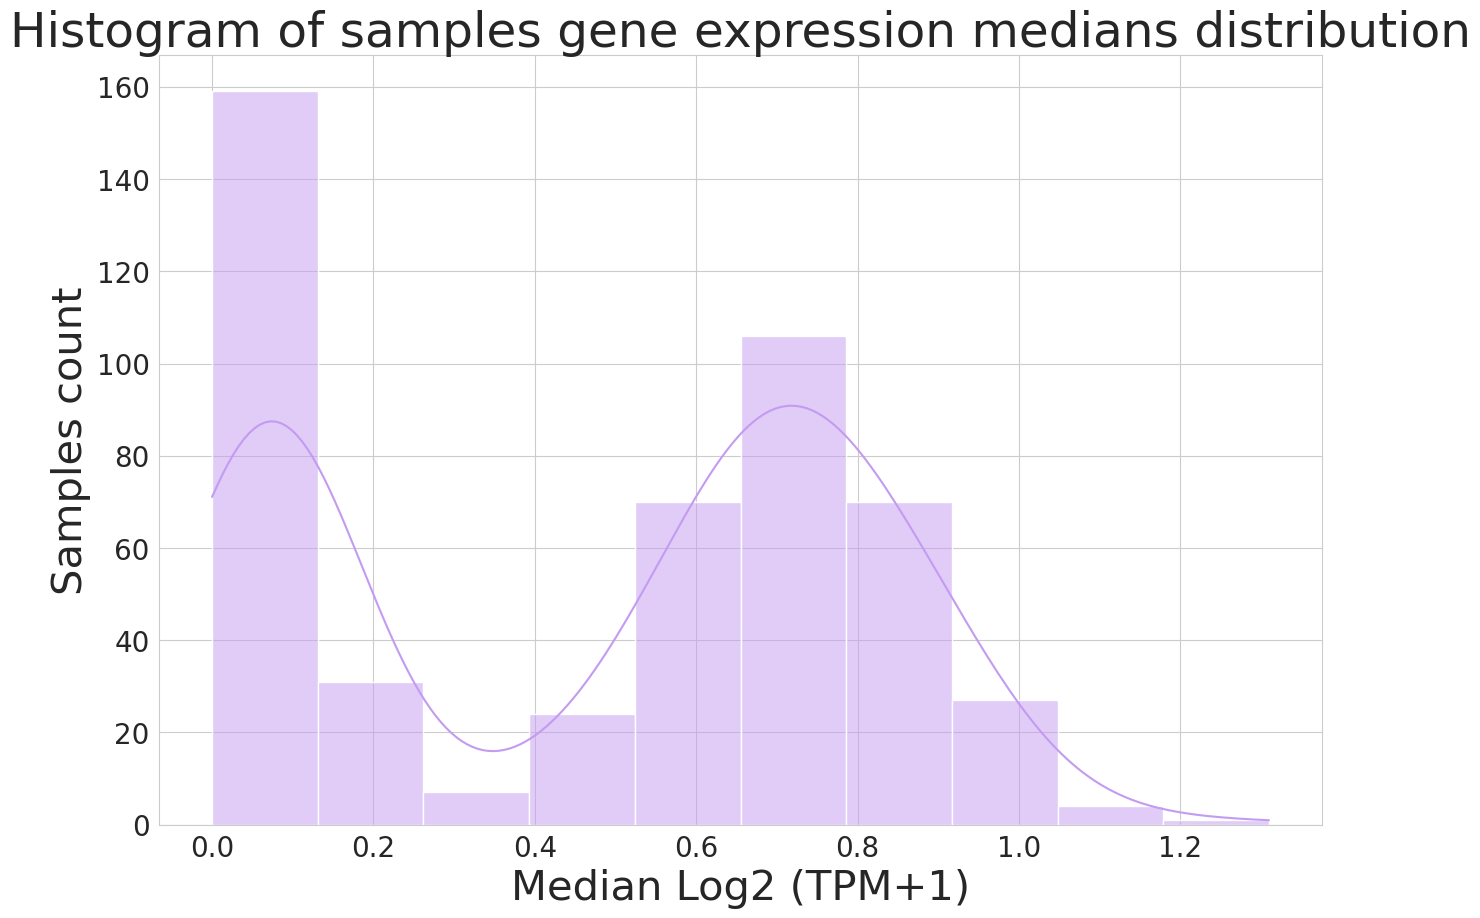

In [11]:
data_hist=data_original.copy(deep=True)

data_hist = data_hist.iloc[:, :500]

log_df = log_df = numpy.log2(data_hist + 1)
median_by_sample = log_df.median()   
matplotlib.pyplot.figure(figsize = (15, 10))
seaborn.histplot(data = median_by_sample, x = median_by_sample[1:], kde = True, color = '#C39BF1')

matplotlib.pyplot.title('Histogram of samples gene expression medians distribution', fontsize = 35)
matplotlib.pyplot.ylabel('Samples count', fontsize = 30)
matplotlib.pyplot.xlabel('Median Log2 (TPM+1)', fontsize = 30)

matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
matplotlib.pyplot.savefig('/home/marti/jupy/jup_notebook/Project/result/Graphs/histplot.png')

In [12]:
df_quantile.to_csv('/home/marti/jupy/jup_notebook/Project/result/data_normalized.csv', index=True, sep='\t')